In [24]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight')
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [2]:
#Searching Hashtag and converting it to Data Frame
i = 1
joe = tweepy.Cursor(api.search,q='#JoeBiden', lang = 'en', since = '2021-01-25').items(1000)
for tweet in joe:
    print(str(i),') ',tweet.created_at, ':', tweet.text,'\n')
    details = [[tweet.created_at, tweet.text] for tweet in joe]
    df = pd.DataFrame(data = details, columns = ['Date', 'Tweets'])
    #print(df)
    i = i+1
    
print(df)

1 )  2021-02-01 08:02:02 : RT @RoohiRashedi2: Dear President @POTUS  and  @VP , please give another chance to all Lottery winners who had been refused under section 2… 

                   Date                                             Tweets
0   2021-02-01 08:01:53  RT @Eli61462527: Dear President \n@POTUS\n  an...
1   2021-02-01 08:01:48  BlissfulBeauty: RT @jbf1982: @BreakingBrown @t...
2   2021-02-01 08:01:08  RT @vicgerami: .@POTUS President #JoeBiden &am...
3   2021-02-01 08:00:28  RT @MediaTechNation: President #JoeBiden and h...
4   2021-02-01 08:00:00  RT @seemajena2001: @sanjeev93882222 @JoeBiden ...
..                  ...                                                ...
994 2021-01-31 21:38:29  RT @DemsAbroad: #PresidentBiden signed several...
995 2021-01-31 21:38:16  RT @DemsAbroad: #PresidentBiden signed several...
996 2021-01-31 21:36:42  For a real man I don’t know... Richard.... you...
997 2021-01-31 21:36:19  @Damelya_HRW Yeah, you want to be a slave in #...
998 2

In [6]:
#cleaning the tweets
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+',' ', text)
    text = re.sub(r'#',' ', text)
    text = re.sub(r'RT[\s]+',' ', text)
    text = re.sub(r'https?:\/\/\s+', ' ', text)
    return text

df['Tweets'] = df['Tweets'].apply(cleantext)
print(df)

                   Date                                             Tweets
0   2021-02-01 08:01:53   : Dear President \n \n  and  \n \n , please g...
1   2021-02-01 08:01:48  BlissfulBeauty:  :     and  ADOS spent the las...
2   2021-02-01 08:01:08   : .  President  JoeBiden &amp; Secretary  Ant...
3   2021-02-01 08:00:28   : President  JoeBiden and his administration ...
4   2021-02-01 08:00:00   :     Please help with a path to Citizenship ...
..                  ...                                                ...
994 2021-01-31 21:38:29   :  PresidentBiden signed several more  execut...
995 2021-01-31 21:38:16   :  PresidentBiden signed several more  execut...
996 2021-01-31 21:36:42  For a real man I don’t know... Richard.... you...
997 2021-01-31 21:36:19   _HRW Yeah, you want to be a slave in  JoeBide...
998 2021-01-31 21:36:16   :  BTS's  Jungkook has the most liked Artist ...

[999 rows x 2 columns]


In [7]:
#Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [8]:
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
print(df)

                   Date                                             Tweets  \
0   2021-02-01 08:01:53   : Dear President \n \n  and  \n \n , please g...   
1   2021-02-01 08:01:48  BlissfulBeauty:  :     and  ADOS spent the las...   
2   2021-02-01 08:01:08   : .  President  JoeBiden &amp; Secretary  Ant...   
3   2021-02-01 08:00:28   : President  JoeBiden and his administration ...   
4   2021-02-01 08:00:00   :     Please help with a path to Citizenship ...   
..                  ...                                                ...   
994 2021-01-31 21:38:29   :  PresidentBiden signed several more  execut...   
995 2021-01-31 21:38:16   :  PresidentBiden signed several more  execut...   
996 2021-01-31 21:36:42  For a real man I don’t know... Richard.... you...   
997 2021-01-31 21:36:19   _HRW Yeah, you want to be a slave in  JoeBide...   
998 2021-01-31 21:36:16   :  BTS's  Jungkook has the most liked Artist ...   

     Subjectivity  Polarity  
0        0.000000  0.000000  
1  

In [17]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
print(df)

                   Date                                             Tweets  \
0   2021-02-01 08:01:53   : Dear President \n \n  and  \n \n , please g...   
1   2021-02-01 08:01:48  BlissfulBeauty:  :     and  ADOS spent the las...   
2   2021-02-01 08:01:08   : .  President  JoeBiden &amp; Secretary  Ant...   
3   2021-02-01 08:00:28   : President  JoeBiden and his administration ...   
4   2021-02-01 08:00:00   :     Please help with a path to Citizenship ...   
..                  ...                                                ...   
994 2021-01-31 21:38:29   :  PresidentBiden signed several more  execut...   
995 2021-01-31 21:38:16   :  PresidentBiden signed several more  execut...   
996 2021-01-31 21:36:42  For a real man I don’t know... Richard.... you...   
997 2021-01-31 21:36:19   _HRW Yeah, you want to be a slave in  JoeBide...   
998 2021-01-31 21:36:16   :  BTS's  Jungkook has the most liked Artist ...   

     Subjectivity  Polarity  Analysis  
0        0.000000  0.00

In [18]:
#Getting Positive tweets
j = 1
sorted_df = df.sort_values(by = ['Polarity'])
for i in range (0,sorted_df.shape[0]):
    if (sorted_df['Analysis'][i] == 'Positive'):
        print(str(j), ') ', sorted_df['Tweets'][i],'\n')
        j = j+1

1 )   : Here’s a look at some of the works that President Joe Biden and First Lady Dr. Jill Biden have chosen to decorate their h… 

2 )   : Yo   JoeBiden this 💩 right here doesn’t happen in countries that actually give a damn about HUMAN LIVES &amp; provide universa… 

3 )   : Dear President   and  , most of 2020 DV lottery winners did not even make it to the interview due to the pandemic(… 

4 )   : Dear President   and  , most of 2020 DV lottery winners did not even make it to the interview due to the pandemic(C… 

5 )  US FOREIGN POLICY UNDER BIDEN’S ADMINISTRATION

As a candidate,  JoeBiden said he would reverse many of the foreign… https://t.co/HnZRdPatoh 

6 )   : Dear President   and  , most of 2020 DV lottery winners did not even make it to the interview due to the pandemic(C… 

7 )  4/5

THE DEVIL IS IN THE DETAILS

- About 6 in 10 Americans think that  Biden can get DC to be more cooperative

Mo… https://t.co/QOyKLpDF94 

8 )   JoeBiden does not want to interfere in the proc

In [19]:
#Getting Negative tweets

j = 1
sorted_df = df.sort_values(by = ['Polarity'])
for i in range (0,sorted_df.shape[0]):
    if (sorted_df['Analysis'][i] == 'Negative'):
        print(str(j), ') ', sorted_df['Tweets'][i],'\n')
        j = j+1

1 )  BlissfulBeauty:  :     and  ADOS spent the last two years telling everyone about… https://t.co/9mQAvQpYzr 

2 )   :     Please help with a path to Citizenship for anyone legal or illegal or Aged out kids who cross… 

3 )  And even  JoeBiden seems not interested in rejoining  IranDeal ! 

Continuity of  Trump's policy !!! https://t.co/J3xlMoLgHP 

4 )   :     Please help with a path to Citizenship for anyone legal or illegal or Aged out kids who cross… 

5 )  Myanmar's military seizes power in a coup after detaining leader Aung San Suu Kyi and ruling party politicians… https://t.co/D6nrt3anzQ 

6 )   _biden: This is brutal, Not Done

 GeorgeFloydOfIndia 
 JoeBiden
 KamlaHarris
 PeacefulProtestContinues
 FarmersProtest
🇺🇸🇮🇳🇺🇸
 … 

7 )  My father, uncles, and aunt believe  JoeBiden will do something to help repair the black community he help destroy.... BidenLied 

8 )  You can't shit the players, let alone the fans,  JoeBiden 

9 )   China and  JoeBiden had started their game well i

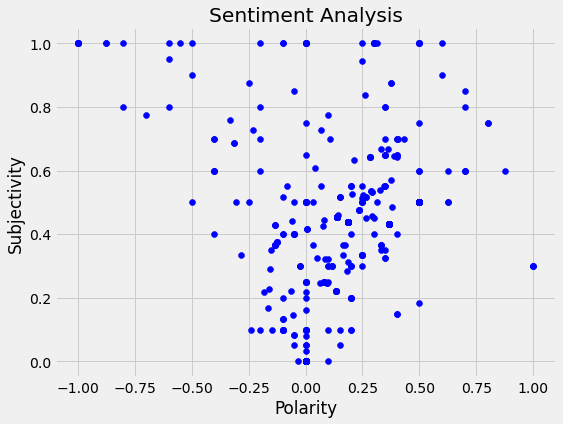

In [25]:
#plotting scatter plot for sentiments
plt.figure(figsize = (8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [33]:
#percentage of negavite Tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
negative = round((ntweets.shape[0]/df.shape[0]*100),1)
print(negative,'%')

9.4 %


In [34]:
#percentage of positive Tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
positive = round((ptweets.shape[0]/df.shape[0]*100),1)
print(positive,'%')

30.3 %


In [36]:
#percentage of neutral Tweets

Neutweets = df[df.Analysis == 'Neutral']
Neutweets = Neutweets['Tweets']
neutral = round((Neutweets.shape[0]/df.shape[0]*100),1)
print(neutral,'%')

60.3 %


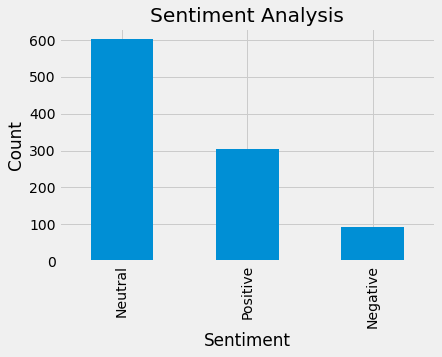

In [30]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [38]:
text_file = open('JoeBiden Sentiment Analysi.txt', 'a', encoding='utf-8')
text_file.write('c) Sentiment Analysis for #JoeBiden (Is it positive/negative, what is the perception)\n')
text_file.write('Positive: %d \n' %positive)
text_file.write('Negative: %d \n' %negative)
text_file.write('Neutral: %d \n' %neutral)
text_file.write('Overall Sentiments of the tweets are neutral for Joe Biden')
text_file.close()